In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [2]:
no_retract = pd.read_csv('./no_retraction_data_plos_only_cleaned.csv')
no_retract = no_retract.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

retract = pd.read_csv('./retraction_data_plos_only_cleaned.csv')
retract = retract.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [3]:
total = pd.read_csv('./total_data_plos_only_cleaned.csv')
total = total.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
total.head()

,doi,year,month,day,volume,issue,journal,title,text,abstract,keywords,retraction_binary,unpacked_keywords,clean_text,clean_text_lem
0,10.1208/s12249-016-0596-x,2016.0,8.0,10.0,18.0,5.0,AAPS PharmSciTech,Study of the Transformations of Micro/Nano-cry...,‘Polymorphism’ generally referred as the abili...,This study elucidates the physical properties ...,"['monoclinic', 'nano-sized crystals', 'orthorh...",1,"['monoclinic', 'nano-sized', 'crystals', 'orth...",Polymorphism generally referred as the ability...,Polymorphism generally referred a the ability ...
1,10.1021/acscentsci.9b00224,2019.0,5.0,9.0,5.0,6.0,ACS central science,Targeted Protein Internalization and Degradati...,Traditional\ndrug development efforts are focu...,Targeted,[],1,[],Traditional drug development efforts are focus...,Traditional drug development effort are focuse...
2,10.1021/acsomega.8b00488,2018.0,6.0,27.0,3.0,6.0,ACS omega,Regulating the Microstructure of Intumescent F...,Intumescent flame retardants\nare now being us...,A compatibilizer,[],1,[],Intumescent flame retardants are now being use...,Intumescent flame retardant are now being used...
3,10.1021/acsomega.8b00153,2018.0,6.0,25.0,3.0,6.0,ACS omega,Solid-to-Solid Crystallization of Organic Thin...,Crystal growth process is basic and essential ...,The solid-to-solid crystallization processes o...,[],1,[],Crystal growth process is basic and essential ...,Crystal growth process is basic and essential ...
4,10.1107/S1600536811022574,2011.0,6.0,18.0,67.0,NaN,"Acta crystallographica. Section E, Structure r...",Oxonium picrate.,For general background to organic salts of pic...,"The title compound, H3O+·C6H2N3O7",[],1,[],For general background to organic salts of pic...,For general background to organic salt of picr...


In [6]:
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = stopwords.words("english"), #stopwords were removed
                            max_features = 10000)

In [7]:
vectorizer.fit(retract['clean_text_lem'])
vect = vectorizer.transform(retract['clean_text_lem'])
vect_retract = pd.DataFrame(vect.toarray(), columns = vectorizer.get_feature_names())

In [8]:
vect_retract.head()

,0d0,10a,10b,10e8,10x,11a,11m088,125a,125b,126a,...,μmol,νmax,χ2,χn,χγ,χζ,ψb,ψh,ψp,ϵ0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# have equation characters, have numerical/letter combinations

In [10]:
vect_retract.columns[:1000]

Index(['0d0', '10a', '10b', '10e8', '10x', '11a', '11m088', '125a', '125b',
       '126a',
       ...
       'behavioural', 'behind', 'beijing', 'bela', 'belfast', 'belgium',
       'belief', 'believe', 'believed', 'belong'],
      dtype='object', length=1000)

In [11]:
vect_retract.columns[9000:]

Index(['tendency', 'tendon', 'tends', 'tenofovir', 'tensile', 'tension',
       'term', 'termed', 'terminal', 'terminally',
       ...
       'μmol', 'νmax', 'χ2', 'χn', 'χγ', 'χζ', 'ψb', 'ψh', 'ψp', 'ϵ0'],
      dtype='object', length=1000)

In [12]:
ls = []
for i in vect_retract.columns:
    word_sum = vect_retract[i].sum()
    ls.append(word_sum) #create a list of the total number of times each word was used

#The script below was adapted from https://www.kite.com/python/answers/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python
sum_row = pd.Series(ls, index = vect_retract.columns) #the list was turned into a series
vect_retract = vect_retract.append(sum_row, ignore_index = True) #the series was added to the end of the dataframe as a new row
vect_retract

,0d0,10a,10b,10e8,10x,11a,11m088,125a,125b,126a,...,μmol,νmax,χ2,χn,χγ,χζ,ψb,ψh,ψp,ϵ0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1536,0,0,0,0,0,0,0,0,0,0,...,0,0,8,0,0,0,0,0,0,0


In [13]:
vect_retract.iloc[1537, :].sort_values(ascending=False).head(50)

wa               157152
cell             128810
study             42884
group             40348
using             39680
level             39027
patient           37508
expression        35759
figure            35648
control           35270
usepackage        33089
used              31573
protein           31496
al                30500
et                29665
data              28523
analysis          27986
fig               27421
gene              26404
time              26017
also              25222
treatment         24966
effect            24135
ml                23430
result            22334
ha                21947
antibody          21716
two               21521
vitamin           20472
mouse             19963
sample            19096
compared          18733
different         17579
significant       17245
value             17214
concentration     17061
one               17035
model             17035
well              17003
day               16819
high              16804
disease         

NO RETRACTIONS

In [14]:
vectorizer.fit(no_retract['clean_text_lem'])
vect = vectorizer.transform(no_retract['clean_text_lem'])
vect_no_retract = pd.DataFrame(vect.toarray(), columns = vectorizer.get_feature_names())

In [15]:
vect_no_retract.head()

,100μl,10a,10b,10mm,10th,10x,10μm,12a,12h,13c,...,μct,μg,μl,μm,μm2,μmol,μs,μv,σ2,χ2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,16,0,26,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,4,0,0,0,0,0,0,0,...,0,20,2,2,0,0,0,0,0,0


In [16]:
vect_no_retract.columns[:1000]

Index(['100μl', '10a', '10b', '10mm', '10th', '10x', '10μm', '12a', '12h',
       '13c',
       ...
       'behind', 'beijing', 'belgium', 'belief', 'believe', 'believed',
       'belong', 'belonged', 'belonging', 'belongs'],
      dtype='object', length=1000)

In [17]:
vect_no_retract.columns[9000:]

Index(['teacher', 'teaching', 'team', 'tear', 'tecan', 'technical',
       'technician', 'technique', 'technological', 'technologies',
       ...
       'μct', 'μg', 'μl', 'μm', 'μm2', 'μmol', 'μs', 'μv', 'σ2', 'χ2'],
      dtype='object', length=1000)

In [18]:
ls = []
for i in vect_no_retract.columns:
    word_sum = vect_no_retract[i].sum()
    ls.append(word_sum) #create a list of the total number of times each word was used

#The script below was adapted from https://www.kite.com/python/answers/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python
sum_row = pd.Series(ls, index = vect_no_retract.columns) #the list was turned into a series
vect_no_retract = vect_no_retract.append(sum_row, ignore_index = True) #the series was added to the end of the dataframe as a new row
vect_no_retract

,100μl,10a,10b,10mm,10th,10x,10μm,12a,12h,13c,...,μct,μg,μl,μm,μm2,μmol,μs,μv,σ2,χ2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,16,0,26,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,4,0,0,0,0,0,0,0,...,0,20,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9203,2,0,0,0,0,0,0,0,0,0,...,0,17,12,9,0,0,0,0,0,0
9204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9205,0,0,0,0,0,0,0,0,0,0,...,0,10,10,9,0,0,0,0,0,0


In [19]:
vect_no_retract.iloc[3427, :].sort_values(ascending=False).head(50)

pcl           286
flexion       269
strain        241
bundle        238
knee          163
force         153
study         150
ligament      108
reported      106
wa            105
data          101
al             91
co             76
worker         75
pattern        75
pm             69
passive        66
using          65
mid            64
posterior      56
used           55
different      54
loading        52
elongation     51
result         51
based          49
full           49
length         47
technique      44
found          43
joint          43
load           42
trend          38
vitro          37
virtual        37
article        37
modelling      36
throughout     36
sensor         35
site           34
vivo           34
extension      33
calculated     32
however        32
model          31
activity       31
angle          30
anterior       30
maximum        29
reference      29
Name: 3427, dtype: int64

TOTAL

In [20]:
total.head()

,doi,year,month,day,volume,issue,journal,title,text,abstract,keywords,retraction_binary,unpacked_keywords,clean_text,clean_text_lem
0,10.1208/s12249-016-0596-x,2016.0,8.0,10.0,18.0,5.0,AAPS PharmSciTech,Study of the Transformations of Micro/Nano-cry...,‘Polymorphism’ generally referred as the abili...,This study elucidates the physical properties ...,"['monoclinic', 'nano-sized crystals', 'orthorh...",1,"['monoclinic', 'nano-sized', 'crystals', 'orth...",Polymorphism generally referred as the ability...,Polymorphism generally referred a the ability ...
1,10.1021/acscentsci.9b00224,2019.0,5.0,9.0,5.0,6.0,ACS central science,Targeted Protein Internalization and Degradati...,Traditional\ndrug development efforts are focu...,Targeted,[],1,[],Traditional drug development efforts are focus...,Traditional drug development effort are focuse...
2,10.1021/acsomega.8b00488,2018.0,6.0,27.0,3.0,6.0,ACS omega,Regulating the Microstructure of Intumescent F...,Intumescent flame retardants\nare now being us...,A compatibilizer,[],1,[],Intumescent flame retardants are now being use...,Intumescent flame retardant are now being used...
3,10.1021/acsomega.8b00153,2018.0,6.0,25.0,3.0,6.0,ACS omega,Solid-to-Solid Crystallization of Organic Thin...,Crystal growth process is basic and essential ...,The solid-to-solid crystallization processes o...,[],1,[],Crystal growth process is basic and essential ...,Crystal growth process is basic and essential ...
4,10.1107/S1600536811022574,2011.0,6.0,18.0,67.0,NaN,"Acta crystallographica. Section E, Structure r...",Oxonium picrate.,For general background to organic salts of pic...,"The title compound, H3O+·C6H2N3O7",[],1,[],For general background to organic salts of pic...,For general background to organic salt of picr...


In [149]:
X = total['clean_text_lem']
y = total['retraction_binary']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [151]:
y_test.value_counts(normalize=True).mul(100).round(2)

0    85.7
1    14.3
Name: retraction_binary, dtype: float64

In [152]:
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = stopwords.words("english"), #stopwords were removed
                            max_features = 5000)

In [153]:
vectorizer.fit(X_train)
#stopwords not super helpful because always talking in third person passive
#stopwords should also be lemmatized
#need to make science stopwords list

CountVectorizer(max_features=5000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [154]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [155]:
X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=vectorizer.get_feature_names())
X_test_df = pd.DataFrame(X_test.toarray(),
                          columns=vectorizer.get_feature_names())

In [156]:
mnb = MultinomialNB()

In [157]:
mnb.fit(X_train_df, y_train)
print(mnb.score(X_train_df, y_train))
print(mnb.score(X_test_df, y_test))

0.7877621943651483
0.7617274758004468


In [158]:
print(max(mnb.coef_[0]))
print(min(mnb.coef_[0]))
print((mnb.coef_[0]).mean())

-3.9476697699500427
-15.627633934849708
-9.354216316794481


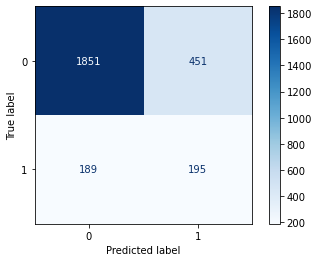

In [159]:
plot_confusion_matrix(mnb, X_test_df, y_test, cmap='Blues', values_format='d');

In [ ]:
#5000 features, default everything, 78.8% train, 76.2% test, 195 true/predict 1, 189 true 1/predict 0, 451 false positives
#10000 features, default everything, 81.4% train, 77.6% test, 194 true/predict 1, 190 true 1/predict 0, 411 false positives
#20000 features, default everything, 86.3% train, 80.0% test, 187 true/predict 1, 197 true 1/predict 0, 346 false positives
#50000 features, default everything, 90.8% train, 81.8% test, 186 true/predict 1, 198 true 1/predict 0, 291 false positives
#100000 features, default everything, 92.4% train, 82.8% test, 180 true/predict 1, 204 true 1/predict 0, 257 false positives

Adding to Stopwords List

In [4]:
lemmatizer = WordNetLemmatizer()
lem_stopwords = [lemmatizer.lemmatize(i) for i in stopwords.words("english")]
lem_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'it',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'wa',
 'were',
 'be',
 'been',
 'being',
 'have',
 'ha',
 'had',
 'having',
 'do',
 'doe',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'a',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 '

In [5]:
retraction_stopwords = ['wa', 'using', 'et', 'al', 'figure', 'usepackage', 'used', 'fig', 'also', 
                        'ml', 'ha', 'two', 'one', 'may', 'based', 'table', 'however', 'data', 'mm', 'ms']

In [6]:
#https://www.quora.com/Is-there-any-list-of-stopwords-related-to-scientific-papers
science_stopwords = ['any','apply','applying','reapplying','given','papers','paper','about',
                     'results','result','real','world','page','article','present','takes',
                     'account', 'previous','work','propose','proposes','proposed','simply','simple',
                     'demonstrate','demonstrated','demonstrates','realworld','datasets','dataset',
                     'provide','important','research','researchers','experiments','experiment','unexpected',
                     'discovering','using','recent','collected','solve','columns','existing','traditional',
                     'final','consider','presented','provides','automatically','extracting','including','help',
                     'helps','explore','illustrate','achieve','better']

In [84]:
X = total['clean_text_lem']
y = total['retraction_binary']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [86]:
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = stopwords.words("english")+ lem_stopwords + retraction_stopwords + science_stopwords, #stopwords were removed
                            max_features = 1000)

In [87]:
vectorizer.fit(X_train)

CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [88]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [89]:
X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=vectorizer.get_feature_names())
X_test_df = pd.DataFrame(X_test.toarray(),
                          columns=vectorizer.get_feature_names())

In [90]:
mnb = MultinomialNB()

In [91]:
mnb.fit(X_train_df, y_train)
print(mnb.score(X_train_df, y_train))
print(mnb.score(X_test_df, y_test))

0.7206156137520169
0.6980640357408786


In [15]:
print(max(mnb.coef_[0]))
print(min(mnb.coef_[0]))
print((mnb.coef_[0]).mean())

-4.311344307658965
-15.781341394573271
-14.220088700233548


In [45]:
count = 0
for i in range(0, len(mnb.coef_[0])):
    if mnb.coef_[0][i] == -15.70119272974359:
        count +=1
    else:
        pass
print(count)

1897


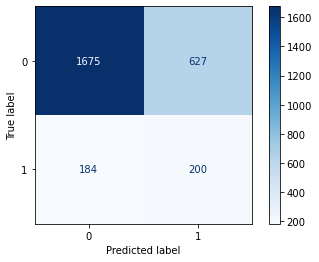

In [92]:
plot_confusion_matrix(mnb, X_test_df, y_test, cmap='Blues', values_format='d');

In [ ]:
#1000 features, more stopwords, 72.1% train, 69.8% test, 200 true/predict 1, 184 true 1/predict 0, 627 false positives
#5000 features, more stopwords, 77.5% train, 74.8% test, 192 true/predict 1, 192 true 1/predict 0, 485 false positives
#20000 features, more stopwords, 85.4% train, 78.4% test, 183 true/predict 1, 201 true 1/predict 0, 378 false positives
#100000 features, more stopwords, 91.8% train, 81.6% test, 174 true/predict 1, 210 true 1/predict 0, 283 false positives

In [ ]:
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = stopwords.words("english")+ lem_stopwords + retraction_stopwords + science_stopwords, #stopwords were removed
                            max_features = 10000)

In [ ]:
vectorizer.fit(retract['clean_text_lem'])
vect = vectorizer.transform(retract['clean_text_lem'])
vect_retract = pd.DataFrame(vect.toarray(), columns = vectorizer.get_feature_names())

In [ ]:
vect_retract.columns[:1000]

In [ ]:
vect_retract.columns[9000:]

In [ ]:
ls = []
for i in vect_retract.columns:
    word_sum = vect_retract[i].sum()
    ls.append(word_sum) #create a list of the total number of times each word was used

#The script below was adapted from https://www.kite.com/python/answers/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python
sum_row = pd.Series(ls, index = vect_retract.columns) #the list was turned into a series
vect_retract = vect_retract.append(sum_row, ignore_index = True) #the series was added to the end of the dataframe as a new row
vect_retract

In [ ]:
vect_retract.iloc[1537, :].sort_values(ascending=False).head(50)

In [ ]:
vectorizer.fit(no_retract['clean_text_lem'])
vect = vectorizer.transform(no_retract['clean_text_lem'])
vect_no_retract = pd.DataFrame(vect.toarray(), columns = vectorizer.get_feature_names())

In [ ]:
vect_no_retract.columns[:1000]

In [ ]:
vect_no_retract.columns[9000:]

In [ ]:
ls = []
for i in vect_no_retract.columns:
    word_sum = vect_no_retract[i].sum()
    ls.append(word_sum) #create a list of the total number of times each word was used

#The script below was adapted from https://www.kite.com/python/answers/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python
sum_row = pd.Series(ls, index = vect_no_retract.columns) #the list was turned into a series
vect_no_retract = vect_no_retract.append(sum_row, ignore_index = True) #the series was added to the end of the dataframe as a new row
vect_no_retract

In [ ]:
vect_no_retract.iloc[3427, :].sort_values(ascending=False).head(50)

TF-IDF Vectorizer

In [93]:
X = total['clean_text_lem']
y = total['retraction_binary']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [95]:
tvec = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, 
                       stop_words = stopwords.words("english")+ lem_stopwords + retraction_stopwords + science_stopwords)

In [96]:
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).toarray(),
                  columns=tvec.get_feature_names())
X_test_df = pd.DataFrame(tvec.transform(X_test).toarray(),
                  columns=tvec.get_feature_names())

In [97]:
mnb = MultinomialNB()

In [98]:
mnb.fit(X_train_df, y_train)
print(mnb.score(X_train_df, y_train))
print(mnb.score(X_test_df, y_test))

0.85466054362666
0.8588979895755771


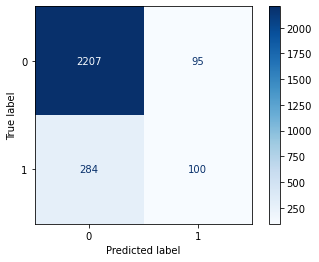

In [99]:
plot_confusion_matrix(mnb, X_test_df, y_test, cmap='Blues', values_format='d');

In [ ]:
#1000, more stopwords/tfidf bigrams, 85.5% train, 85.9% test, 100 predict/true 1, 284 predict 0/true 1, 95 false positives
#5000, more stopwords/tfidf bigrams, 86.6% train, 85.8% test, 138 predict/true 1, 246 predict 0/true 1, 134 false positives
#20000, more stopwords/tfidf bigrams, 88.9% train, 87.9% test, 78 predict/true 1, 306 predict 0/true 1, 19 false positives
#100000, more stopwords/tfidf bigrams, 86.4% train, 86.2% test, 12 predict/true 1, 372 predict 0/true 1, 0 false positives

#5000, more stopwords/tfidf trigrams, 86.6% train, 85.9% test, 139 predict/true 1, 245 predict 0/true 1, 135 false positives
#20000, more stopwords/tfidf trigrams, 88.8% train, 88.0% test, 86 predict/true 1, 298 predict 0/true 1, 23 false positives
#100000, more stopwords/tfidf trigrams, 86.6% train, 86.3% test, 17 predict/true 1, 367 predict 0/true 1, 0 false positives

Changing Test Size

In [105]:
X = total['clean_text_lem']
y = total['retraction_binary']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify=y,
                                                    random_state=42)

0.7783244680851064
0.7533354017995656


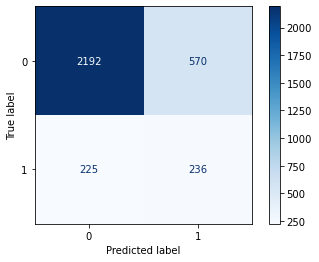

In [107]:
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = stopwords.words("english")+ lem_stopwords + retraction_stopwords + science_stopwords, #stopwords were removed
                            max_features = 5000)

vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=vectorizer.get_feature_names())
X_test_df = pd.DataFrame(X_test.toarray(),
                          columns=vectorizer.get_feature_names())

mnb = MultinomialNB()

mnb.fit(X_train_df, y_train)
print(mnb.score(X_train_df, y_train))
print(mnb.score(X_test_df, y_test))

plot_confusion_matrix(mnb, X_test_df, y_test, cmap='Blues', values_format='d');

0.8659550701253569
0.8585256887565152


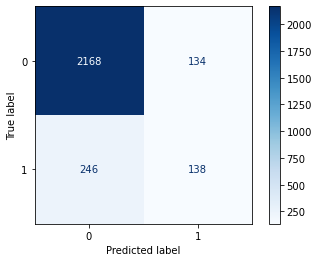

In [83]:
tvec = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, 
                       stop_words = stopwords.words("english")+ lem_stopwords + retraction_stopwords + science_stopwords)

X_train_df = pd.DataFrame(tvec.fit_transform(X_train).toarray(),
                  columns=tvec.get_feature_names())
X_test_df = pd.DataFrame(tvec.transform(X_test).toarray(),
                  columns=tvec.get_feature_names())

mnb = MultinomialNB()

mnb.fit(X_train_df, y_train)
print(mnb.score(X_train_df, y_train))
print(mnb.score(X_test_df, y_test))

plot_confusion_matrix(mnb, X_test_df, y_test, cmap='Blues', values_format='d');

In [69]:
#1000 features, more stopwords/test size 0.3, 72.4% train, 70.0% test, 239 true/predict 1, 222 true 1/predict 0, 755 false positive
#5000 features, more stopwords/test size 0.3, 77.8% train, 75.3% test, 236 true/predict 1, 225 true 1/predict 0, 570 false positive

#20000 features, more stopwords/test size 0.2, 85.2% train, 78.7% test, 156 true/predict 1, 151 true 1/predict 0, 306 false positive
print(144/(144+163))
#20000 features, more stopwords/test size 0.25, 85.4% train, 78.4% test, 183 true/predict 1, 201 true 1/predict 0, 378 false positive
#20000 features, more stopwords/test size 0.3, 86.2% train, 78.8% test, 221 true/predict 1, 240 true 1/predict 0, 442 false positive


#5000 features, more stopwords/bigrams/test size 0.2. 86.4% train, 85.7% test, 113 true/predict 1, 194 true 1/predict 0, 113 false positive
#5000 features, more stopwords/bigrams/test size 0.25. 86.6% train, 85.9% test, 138 true/predict 1, 246 true 1/predict 0, 134 false positive
#5000 features, more stopwords/bigrams/test size 0.3. 86.8% train, 86.1% test, 167 true/predict 1, 294 true 1/predict 0, 154 false positive

0.46905537459283386
0.5208333333333334
0.5140997830802603
 
0.46905537459283386
0.4765625
0.4750542299349241
